# Assignment 7: Unsupervised learning (PCA, K-Means) (1.5pts)

## Introduction

In this assignment, you will need to compute the Principal Component Analysis and K-Means algorithms and use them on a dataset. The dataset is the set of images from MNIST database corresponding to the handwritten digit $7$. Each image is $28px\times 28px$. The set is divided in a training set and a testing set of respective size $3133$ and $3132$.

As usual, the structure of the code is given to you and you need to fill the parts corresponding to the questions below.


## Questions
<b>Question 1 (25%)</b> (<a href='#pca'>Starts here</a>) Complete the functions `pca(.)` and `pca_project(.)`. For information, the function `np.linalg.eigh` compute the eigenvalues and eigenvectors of a symmetric matrix. It returns two arrays, the first one contains the eigenvalues in ascending order and the second one the corresponding eigenvector.<br/>
<b>Question 2 (15%)</b> Using the decomposition learnt on the <b>training test</b>, compute the reconstruction error $E$ on the <b>testing test</b> defined by: 
\begin{align}
E(D) = \frac{1}{N}\sum_{n=1}^N \|I_n - (\mathbf{\mu}+\sum_{k=1}^D \omega_k^n\mathbf{u}_k) \|_2,
\end{align}
with N corresponding to the number of images in the TestSet, $I_n$ denoting the $n$-th image of the testing set, $\mathbf{\mu}$ is the mean digit learnt from the training set, $\mathbf{u}_k$ is the eigenvector with the $k$-th largest eigenvalue, and $\omega_k^n$ is the expansion coefficient of the $n$-th image on the $k$-th eigenvector. Finally, $\|.\|_2$ denotes the $L_2$ norm. Numpy has the method `np.linalg.norm(.)` that computes norms (check out the documentation for more infos).
<br/>
<b>Question 3 (5%)</b> Plot the evolution of the error $E$ for $D = 1,\ldots,100$.

<b>Question 4 (10%)</b> (<a href='#kmeans'>Starts here</a>) Complete the function `distortion(.)` which computes the distortion cost $F$ for a given clustering of the data:
\begin{align}
F(m,c) = \frac{1}{N}\sum_{i=1}^N \|x^i - c^{m(i)}\|_2,
\end{align}
where $N$ corresponds to the total number of images in the set and $m(i)$ denotes which cluster is assigned to the image $x^i$.<br/>
<b>Question 5 (15%)</b> Complete the functions `kmeans(.)` and `assign_cluster(.)`, make sure that it computes the distortion after each update. Then use the function on your training set, the number of cluster $k = 2$. Check that the distortion decreases as the algorithm progresses.<br/>
<b>Question 6 (15%)</b> In order to mitigate the local minima problem of K-Means, repeat the algorithm $10$ times, and keep the solution that yields the smallest distortion at the end. Show the resulting digit clusters.<br/>
<b>Question 7.(10%)</b> Repeat the procedure of Question 6 for values of $k = 3,4,5,10,50,100$ (allow for ~10min). For each such value report the distortion cost of the training and testing data.<br/>

<b>Question 8 (5%)</b> Compare the results from PCA to the results of K-means on the <b>test set</b> by plotting on the same graph the reconstruction error $E(D)$ for $D3,4,5,10,50,100$ and the distortion cost you just computed (remark that the two measures are simply L$_2$ norms thus the comparison is valid). To be clear, the first one measure the error in the reconstructed image from the projection on the components of PCA, the second measure the error between each image and the centroid of the cluster it is assigned to. Both correpond to the error made when approximating the original image to either its projection or its cluster's centroid.



### Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import read, show

%matplotlib inline

### Importing the data to form training and test sets 

(28, 28, 3133) (28, 28, 3132)


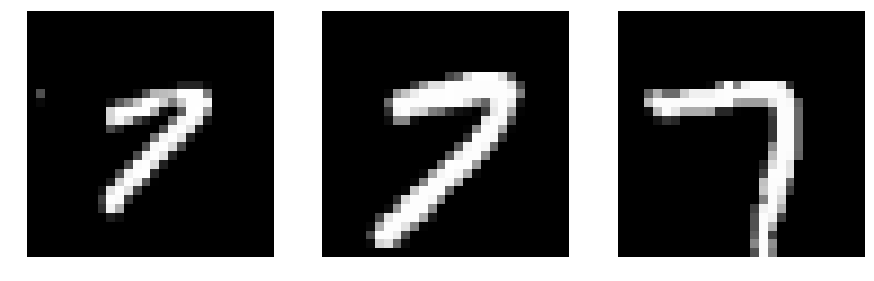

In [2]:
# Reads in the data from MNIST database
data = read() 

# Retrieve the entries corresponding to the digit 7
samples = []
for sample in data:
    if sample[0] == 7:
        samples.append(sample[1].astype(float))
        
# Stack images in a tensor of size 28x28xnb_images
samples = np.stack(samples,axis=2)

# Defines training and testing set
train_set = samples[:,:,:3133]
test_set = samples[:,:,3133:]
print(train_set.shape, test_set.shape)

# Plot some images 
fig, axes = plt.subplots(1,3,figsize=(15,100))
plt.rcParams['image.cmap'] = 'gray'
axes[0].imshow(train_set[:,:,1])
axes[1].imshow(train_set[:,:,100])
axes[2].imshow(train_set[:,:,1000])
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# Transform the data for processing, i.e. unroll the 28x28 images in vectors of size 1x(28*28)
X = np.reshape(train_set,(28*28,3133)).T
Y = np.reshape(test_set,(28*28,3132)).T


<a id='pca'></a>
## Principal Component Analysis
The data has now been initialised, everything is set to start on coding. 

<b>Question 1.</b> Complete the functions `pca(.)` and `pca_project(.)`.

In [3]:
def pca(X,n_components = None):
    
    # If no number of component is specified, the function keeps them all
    if n_components is None:
        n_components = X.shape[1]
    
    ###################### TO DO QUESTION 1 ################################
    
    # Compute mean digit and shift the data
    X_mean = np.mean(X,axis = 0)
    
    X_shifted = np.zeros(X.shape)
    for i in range(X.shape[0]):
        X_shifted[i, :] = X[i, :] - X_mean
    
    # Compute covariance of the data
    X_cov = np.cov(X_shifted, rowvar = False)
    # Compute the eigenvector of the covariance matrix
    X_eigen_val , X_eigen_vec = np.linalg.eigh(X_cov)
    # Retrieve the eigenvectors to return
    
    ###################### TO DO QUESTION 1 ################################
    # Returns the transformed data, the components, and the mean digit
    components = X_eigen_vec[:, -n_components:]
    return X_mean, components

def pca_project(Y,X_mean,components):
    # Compute the projection of the input data on the selected components
    
    ###################### TO DO QUESTION 1 ################################
    
    Y_shift = Y - X_mean
    
    # Compute the expansion coefficients of the data
    
    project = np.dot(Y_shift,components)
    #project = Y_shift@components
    reconstruction = np.dot(project,components.transpose())
    #reconstruction = project@components.transpose()
    
    ###################### TO DO QUESTION 1 ################################
    
    return X_mean + reconstruction 

(-0.5, 27.5, 27.5, -0.5)

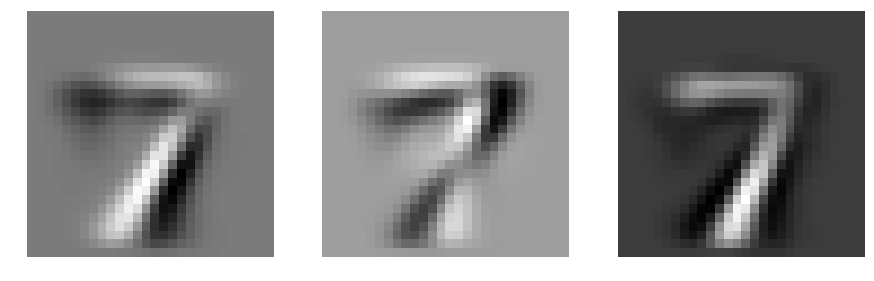

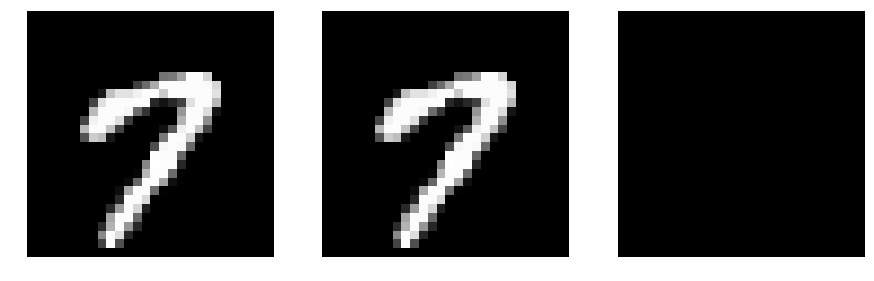

In [4]:
# This tests if your functions are correct, you should get the same output as we do
X_mean, components = pca(X,n_components=None)

# Reshapes the reconstructed data to have 28x28 pictures
comp_ = np.reshape(components,(28,28,784))

fig, axes = plt.subplots(1,3,figsize=(15,100))
plt.rcParams['image.cmap'] = 'gray'
axes[0].imshow(comp_[:,:,-1])
axes[1].imshow(comp_[:,:,-2])
axes[2].imshow(comp_[:,:,-3])
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

X_projected = pca_project(X,X_mean,components)

X_ = np.reshape(X_projected.T,(28,28,3133))
fig, axes = plt.subplots(1,3,figsize=(15,100))
plt.rcParams['image.cmap'] = 'gray'
axes[0].imshow(train_set[:,:,0])
axes[1].imshow(X_[:,:,0])
axes[2].imshow(train_set[:,:,0]-X_[:,:,0]>10**(-12))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

#### Testing PCA 
You now have a (hopefully) working implementation of the Principal Component Analysis algorithm. Use it to fit your training set and observe the results on the testing set.

<b>Question 2.</b> Use the function `pca(.)` to learn a decomposition on the <b>training test</b>, then compute the reconstruction error $E$ on the <b>testing test</b> defined by: 
\begin{align}
E(D) = \frac{1}{N}\sum_{n=1}^N \|I_n - (\mathbf{\mu}+\sum_{k=1}^D \omega_k^n\mathbf{u}_k) \|_2,
\end{align}
with $I_n$ denoting the $n$-th image of the testing set, $\mathbf{\mu}$ is the mean digit learnt from the training set, $\mathbf{u}_k$ is the eigenvector with the $k$-th largest eigenvalue, and $\omega_k^n$ is the expansion coefficient of the $n$-th image on the $k$-th eigenvector. Finally, $\|.\|_2$ denotes the $L_2$ norm.
<br/>


In [5]:
max_n_components = 100 # Max number of components to keep

xrange = range(1,max_n_components+1)
error = []


##################### TO DO QUESTION 2 ##############################
for pca_components in xrange:
    X_mean, components = pca(X,n_components= pca_components)
    Y_projected = pca_project(Y,X_mean,components)
    errors = np.mean(np.linalg.norm(Y - Y_projected, axis = 1))
    error.append(errors)

    
# Compute the Error for n_components between 1 and max_n_components
    
##################### TO DO QUESTION 2 ##############################

<b>Question 3.</b> Plot the evolution of the error $E$ for $D = 1,\ldots,100$.

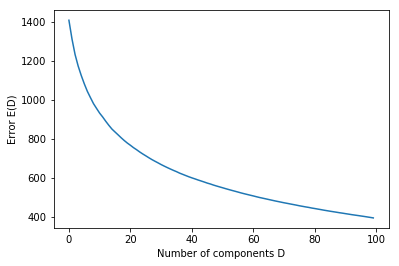

In [6]:

##################### TO DO QUESTION 3 ##############################

# Plot the error with respect to number of components
fig = plt.figure()

plt.plot(error)
plt.xlabel('Number of components D')
plt.ylabel('Error E(D)')

##################### TO DO QUESTION 3 ##############################

<a id='kmeans'></a>
# K-Means
In this section, you will complete the implementation of the k-means algorithm.

<b>Question 4.</b>  Complete the function `distortion(.)` which computes the distortion cost $F$ for a given clustering of the data:
\begin{align}
F(m,c) = \frac{1}{N}\sum_{i=1}^N \|x^i - c^{m(i)}\|_2,
\end{align}
where $N$ corresponds to the total number of images in the set and $m(i)$ denotes which cluster is assigned to the image $x^i$.<br/>

In [7]:
def distortion(X,clusters,centroids):
    
    n_cluster, n_variables = centroids.shape
    distortion = 0
    
    ##################### TO DO QUESTION 4 ##############################
    
    # Compute distortion
    for i in range(X.shape[0]):
        centroid_index = int(clusters[i])
        data_point = X[i, :]
        distortion += np.linalg.norm(data_point - centroids[centroid_index])
    
    ##################### TO DO QUESTION 4 ##############################
        
    return distortion/X.shape[0]


<b>Question 5.</b> Complete the functions `K-means` and `assign_centroid(.)`, make sure that it computes the distortion after each update. Then use the function on your training set, the number of cluster $k = 2$. Check that the distortion decreases as the algorithm progresses.<br/>

In [8]:
def assign_centroid(centroids,X):
    
    n_observations, _ = X.shape
    # Initialise clusters to -1
    clusters = -1*np.ones((n_observations,))
    
    ##################### TO DO QUESTION 5 ##############################

    # Find closest centroid for each image
    
    for i in range(X.shape[0]):
        min_dist = np.inf
        min_cluster = -1
        for j in range(centroids.shape[0]):
            centroid = centroids[j, :]
            data_point = X[i, :]
            distance = np.linalg.norm(data_point - centroid)
            if distance < min_dist:
                min_dist = distance
                min_cluster = j
        clusters[i] = min_cluster        

    ##################### TO DO QUESTION 5 ##############################
        
    return clusters

def kmeans(X, n_clusters = 2, max_iter =1000, tol = 10**-10, verbose = False):
    
    n_observations, n_variables = X.shape
    
    # Randomly initialise the centroids using the multivariate gaussian computed from the data
    X_mean = np.mean(X,axis=0)
    X_cov = np.cov(X,rowvar=False)
    centroids = np.random.multivariate_normal(X_mean,X_cov,(n_clusters,))
    
    n_iter = 0
    distortion_scores = []
    # Loop as long as the number of iterations is below max_iter and if the converging criteria has not be met
    while (n_iter < max_iter):
        n_iter += 1
        # Step 1: assign points to nearest center
        clusters = assign_centroid(centroids,X)
        
        # Step 2: compute distortion
        dist = distortion(X,clusters,centroids)
        distortion_scores.append(dist)
        if verbose:
            print("Iteration %s, distortion = %s" % (n_iter,dist))
              
        # Step 3: compute new centroids from the clusters
        new_centroids = np.zeros(centroids.shape)
        for j in range(n_clusters):
            
            ##################### TO DO QUESTION 5 ##############################
            belong_cluster = [clusters == j]
            cluster_instances = X[belong_cluster]
            cluster_mean = np.mean(cluster_instances, axis =0)
            new_centroids[j] = np.nan_to_num(cluster_mean.transpose())
        
            ##################### TO DO QUESTION 5 ##############################
            
        # Step 4: break the loop if difference between previous centroids and new ones is small enough
        if np.linalg.norm(new_centroids-centroids)<tol:
            if verbose:
                print("Terminates with difference: %s\n" % np.linalg.norm(new_centroids-centroids))
            break
        else:
            centroids = new_centroids
    
    return clusters, centroids, distortion_scores

In [9]:
# If your implementation is correct you should get the same results as us here
np.random.seed(11) # DO NOT CHANGE THIS LINE, it insures your random initialisation is identical to ours

clusters, centroids, distortion_scores = kmeans(X,verbose=True)

Iteration 1, distortion = 2090.74813897
Iteration 2, distortion = 1452.30911102
Iteration 3, distortion = 1447.64905431
Iteration 4, distortion = 1446.00589447
Iteration 5, distortion = 1444.89337228
Iteration 6, distortion = 1444.20812056
Iteration 7, distortion = 1443.80459365
Iteration 8, distortion = 1443.60184782
Iteration 9, distortion = 1443.50877501
Iteration 10, distortion = 1443.43447869
Iteration 11, distortion = 1443.38884229
Iteration 12, distortion = 1443.3651259
Iteration 13, distortion = 1443.33449997
Iteration 14, distortion = 1443.28489795
Iteration 15, distortion = 1443.26795045
Iteration 16, distortion = 1443.26274859
Terminates with difference: 0.0



In [10]:
# Helper function to plot multiple images (non-graded)
def plot_kmeans(centroids, n = 4):
    
    k = centroids.shape[0]
    m = int(np.ceil(k/n))
    fig, axes = plt.subplots(m,n,figsize=(n*5,m*5))
    plt.rcParams['image.cmap'] = 'gray'
    for c in range(k):
        if m == 1:
            axes[c].imshow(np.reshape(centroids[c,:],(28,28)))
            axes[c].axis('off')
        else:
            i, j = int(c/n), int(c - i*n)
            axes[i,j].imshow(np.reshape(centroids[c,:],(28,28)))
            axes[i,j].axis('off')
            
    for c in range(k,m*n):
        if m == 1:
            axes[c].remove()
            axes[c].axis('off')
        else:
            i, j = int(c/n), int(c - i*n)
            axes[i,j].remove()
            axes[i,j].axis('off')
    

#### Testing K-means

<b>Question 6.</b> In order to mitigate the local minima problem of K-Means, repeat the algorithm $10$ times, and keep the solution that yields the smallest distortion at the end. Show the resulting digit clusters (centroids of your clusters) using the `plot_kmeans(.)` function given.<br/>


Run k=2: 1/10.. Iteration 1, distortion = 1908.94536559
Iteration 2, distortion = 1498.34144008
Iteration 3, distortion = 1465.06117714
Iteration 4, distortion = 1453.67263802
Iteration 5, distortion = 1449.67164113
Iteration 6, distortion = 1447.84904335
Iteration 7, distortion = 1446.73824912
Iteration 8, distortion = 1445.72646896
Iteration 9, distortion = 1444.96070624
Iteration 10, distortion = 1444.32157594
Iteration 11, distortion = 1444.02204301
Iteration 12, distortion = 1443.76851774
Iteration 13, distortion = 1443.61986634
Iteration 14, distortion = 1443.52652248
Iteration 15, distortion = 1443.45184567
Iteration 16, distortion = 1443.42564939
Iteration 17, distortion = 1443.38905497
Iteration 18, distortion = 1443.3602504
Iteration 19, distortion = 1443.32629327
Iteration 20, distortion = 1443.28489795
Iteration 21, distortion = 1443.26795045
Iteration 22, distortion = 1443.26274859
Terminates with difference: 0.0

2/10.. Iteration 1, distortion = 2222.04691815
Iteration 2,

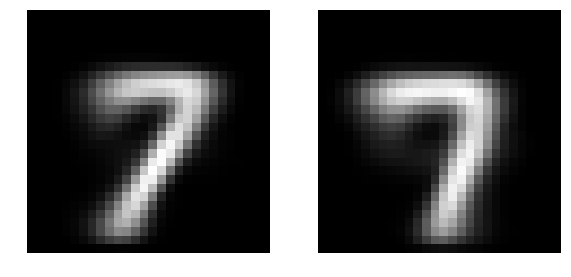

In [11]:
def select_clustering(X,k=2,repeats=10):
    # Returns clustering with lowest distortion across "repeats" number of runs
    clustering = None
    print("Run k=%s:" % k,end=' ')
    
    min_distortion_score = np.inf
    
    for i in range(repeats):
        print("%s/%s.." % (i+1,repeats), end=' ')
        np.random.seed(i) # Do not change this line, it insures you get the same random initialisation as us
        
        ##################### TO DO QUESTION 6 ##############################
        
        # Compute clusters and retrieve the one with lowest distortion
        clusters, centroids, distortion_score = kmeans(X, verbose = True, n_clusters = k)
        if distortion_score[-1] < min_distortion_score:
            min_distortion_score = distortion_score[-1]
            clustering = centroids
            
            
        ##################### TO DO QUESTION 6 ##############################
            
    print("\n",end='')
    return clustering


clustering = select_clustering(X)

##################### TO DO QUESTION 6 ##############################

# Plot the centres of the clusters
plot_kmeans(clustering)

##################### TO DO QUESTION 6 ##############################


<b>Question 7.</b> Repeat the procedure of Question 6 for values of $k = 3,4,5,10,50,100$ (Allow for ~10min). Plot the evolution of the distortion cost of the training and testing data. Think of using the functions `select_clustering(.)`, `assign_centroid(.)`, and `distortion(.)` defined earlier.

In [12]:
train_distortions = []
test_distortions = []

ks = [2,3,4,5,10,50,100]

    
##################### TO DO QUESTION 7 ##############################
for k in ks:
    centroids = select_clustering(X, k=k, repeats = 10)
    train_clustering = assign_centroid(centroids, X)
    train_distortions.append(distortion(X, train_clustering, centroids))
    test_clustering = assign_centroid(centroids, Y)
    test_distortions.append(distortion(Y, test_clustering, centroids))

##################### TO DO QUESTION 7 ##############################

Run k=2: 1/10.. Iteration 1, distortion = 1908.94536559
Iteration 2, distortion = 1498.34144008
Iteration 3, distortion = 1465.06117714
Iteration 4, distortion = 1453.67263802
Iteration 5, distortion = 1449.67164113
Iteration 6, distortion = 1447.84904335
Iteration 7, distortion = 1446.73824912
Iteration 8, distortion = 1445.72646896
Iteration 9, distortion = 1444.96070624
Iteration 10, distortion = 1444.32157594
Iteration 11, distortion = 1444.02204301
Iteration 12, distortion = 1443.76851774
Iteration 13, distortion = 1443.61986634
Iteration 14, distortion = 1443.52652248
Iteration 15, distortion = 1443.45184567
Iteration 16, distortion = 1443.42564939
Iteration 17, distortion = 1443.38905497
Iteration 18, distortion = 1443.3602504
Iteration 19, distortion = 1443.32629327
Iteration 20, distortion = 1443.28489795
Iteration 21, distortion = 1443.26795045
Iteration 22, distortion = 1443.26274859
Terminates with difference: 0.0

2/10.. Iteration 1, distortion = 2222.04691815
Iteration 2,

Iteration 33, distortion = 1399.55940099
Iteration 34, distortion = 1399.4850361
Iteration 35, distortion = 1399.38718738
Iteration 36, distortion = 1399.30442242
Iteration 37, distortion = 1399.16641976
Iteration 38, distortion = 1398.97916504
Iteration 39, distortion = 1398.76239902
Iteration 40, distortion = 1398.45315
Iteration 41, distortion = 1398.06307649
Iteration 42, distortion = 1397.54970396
Iteration 43, distortion = 1397.04818449
Iteration 44, distortion = 1396.55230453
Iteration 45, distortion = 1396.07756786
Iteration 46, distortion = 1395.57504245
Iteration 47, distortion = 1395.11208099
Iteration 48, distortion = 1394.53991772
Iteration 49, distortion = 1394.10721839
Iteration 50, distortion = 1393.70730117
Iteration 51, distortion = 1393.31555065
Iteration 52, distortion = 1392.88576879
Iteration 53, distortion = 1392.48827844
Iteration 54, distortion = 1392.23086926
Iteration 55, distortion = 1391.9943245
Iteration 56, distortion = 1391.71888942
Iteration 57, distort

Iteration 17, distortion = 1353.46170021
Iteration 18, distortion = 1353.45026764
Iteration 19, distortion = 1353.4520309
Iteration 20, distortion = 1353.45893562
Iteration 21, distortion = 1353.45394045
Iteration 22, distortion = 1353.43251541
Iteration 23, distortion = 1353.42724582
Iteration 24, distortion = 1353.38068854
Iteration 25, distortion = 1353.34357596
Iteration 26, distortion = 1353.29462537
Iteration 27, distortion = 1353.21645135
Iteration 28, distortion = 1353.11223774
Iteration 29, distortion = 1353.04275001
Iteration 30, distortion = 1352.92011702
Iteration 31, distortion = 1352.83108676
Iteration 32, distortion = 1352.80997065
Iteration 33, distortion = 1352.79869184
Iteration 34, distortion = 1352.78021098
Iteration 35, distortion = 1352.75150082
Iteration 36, distortion = 1352.73305969
Iteration 37, distortion = 1352.70694126
Iteration 38, distortion = 1352.67822809
Iteration 39, distortion = 1352.66433952
Iteration 40, distortion = 1352.62337274
Iteration 41, dis

Iteration 23, distortion = 1352.33695099
Iteration 24, distortion = 1352.22733357
Iteration 25, distortion = 1352.15534208
Iteration 26, distortion = 1352.11118293
Iteration 27, distortion = 1352.07168968
Iteration 28, distortion = 1352.0508018
Iteration 29, distortion = 1352.01253605
Iteration 30, distortion = 1351.97820925
Terminates with difference: 0.0

7/10.. Iteration 1, distortion = 1847.58466146
Iteration 2, distortion = 1425.49311012
Iteration 3, distortion = 1402.0727817
Iteration 4, distortion = 1388.61698555
Iteration 5, distortion = 1378.56806355
Iteration 6, distortion = 1364.66728451
Iteration 7, distortion = 1355.66371118
Iteration 8, distortion = 1353.37374687
Iteration 9, distortion = 1352.74384941
Iteration 10, distortion = 1352.4095047
Iteration 11, distortion = 1352.21989798
Iteration 12, distortion = 1352.1358642
Iteration 13, distortion = 1352.0922891
Iteration 14, distortion = 1352.03879815
Iteration 15, distortion = 1351.97066934
Iteration 16, distortion = 1351

10/10.. Iteration 1, distortion = 1802.89401085
Iteration 2, distortion = 1373.38589019
Iteration 3, distortion = 1358.04974769
Iteration 4, distortion = 1355.43297921
Iteration 5, distortion = 1354.18889131
Iteration 6, distortion = 1353.62949309
Iteration 7, distortion = 1353.35355286
Iteration 8, distortion = 1353.2004338
Iteration 9, distortion = 1353.09277657
Iteration 10, distortion = 1353.06083109
Iteration 11, distortion = 1353.01369479
Iteration 12, distortion = 1352.92679104
Iteration 13, distortion = 1352.82546596
Iteration 14, distortion = 1352.73880204
Iteration 15, distortion = 1352.64199475
Iteration 16, distortion = 1352.61057164
Iteration 17, distortion = 1352.59403345
Iteration 18, distortion = 1352.57193603
Iteration 19, distortion = 1352.54271277
Iteration 20, distortion = 1352.49541654
Iteration 21, distortion = 1352.42606404
Iteration 22, distortion = 1352.35632193
Iteration 23, distortion = 1352.33868102
Iteration 24, distortion = 1352.30128211
Iteration 25, dist

/Users/siddharth/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/siddharth/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Iteration 2, distortion = 1406.3290508
Iteration 3, distortion = 1355.8585872
Iteration 4, distortion = 1341.91560277
Iteration 5, distortion = 1335.39974259
Iteration 6, distortion = 1332.08528871
Iteration 7, distortion = 1330.39617135
Iteration 8, distortion = 1329.27432916
Iteration 9, distortion = 1328.35309051
Iteration 10, distortion = 1327.64491558
Iteration 11, distortion = 1327.02284967
Iteration 12, distortion = 1326.58329013
Iteration 13, distortion = 1326.12608563
Iteration 14, distortion = 1325.55084718
Iteration 15, distortion = 1325.03398514
Iteration 16, distortion = 1324.48893795
Iteration 17, distortion = 1324.08707934
Iteration 18, distortion = 1323.73769466
Iteration 19, distortion = 1323.47094048
Iteration 20, distortion = 1323.18930861
Iteration 21, distortion = 1322.92435366
Iteration 22, distortion = 1322.73212775
Iteration 23, distortion = 1322.55573175
Iteration 24, distortion = 1322.36747911
Iteration 25, distortion = 1322.22053633
Iteration 26, distortion =

Iteration 52, distortion = 1321.87458256
Iteration 53, distortion = 1321.80217623
Iteration 54, distortion = 1321.77363313
Iteration 55, distortion = 1321.74936347
Iteration 56, distortion = 1321.72538602
Iteration 57, distortion = 1321.70782161
Iteration 58, distortion = 1321.69744729
Iteration 59, distortion = 1321.69006006
Terminates with difference: 0.0

8/10.. Iteration 1, distortion = 1768.11857483
Iteration 2, distortion = 1373.86026594
Iteration 3, distortion = 1358.22931862
Iteration 4, distortion = 1350.2419691
Iteration 5, distortion = 1344.79052791
Iteration 6, distortion = 1342.05708283
Iteration 7, distortion = 1340.63101502
Iteration 8, distortion = 1339.67663289
Iteration 9, distortion = 1338.77823845
Iteration 10, distortion = 1337.62419742
Iteration 11, distortion = 1336.708226
Iteration 12, distortion = 1335.93195488
Iteration 13, distortion = 1335.08053979
Iteration 14, distortion = 1334.5943026
Iteration 15, distortion = 1334.01353127
Iteration 16, distortion = 133

Iteration 31, distortion = 1246.54676508
Iteration 32, distortion = 1246.55097964
Iteration 33, distortion = 1246.54922397
Iteration 34, distortion = 1246.53298368
Iteration 35, distortion = 1246.52877662
Iteration 36, distortion = 1246.51736126
Iteration 37, distortion = 1246.50915492
Iteration 38, distortion = 1246.51048422
Iteration 39, distortion = 1246.50867322
Iteration 40, distortion = 1246.50627555
Iteration 41, distortion = 1246.49788585
Iteration 42, distortion = 1246.49918335
Iteration 43, distortion = 1246.50617474
Iteration 44, distortion = 1246.51050883
Iteration 45, distortion = 1246.5127311
Iteration 46, distortion = 1246.51462042
Terminates with difference: 0.0

3/10.. Iteration 1, distortion = 1827.39355437
Iteration 2, distortion = 1327.37215144
Iteration 3, distortion = 1290.70630296
Iteration 4, distortion = 1277.5743778
Iteration 5, distortion = 1268.2059878
Iteration 6, distortion = 1263.17409512
Iteration 7, distortion = 1260.80722758
Iteration 8, distortion = 1

Iteration 44, distortion = 1248.19598282
Iteration 45, distortion = 1248.13801176
Iteration 46, distortion = 1248.09436833
Iteration 47, distortion = 1248.09442913
Iteration 48, distortion = 1248.09098666
Iteration 49, distortion = 1248.08361089
Iteration 50, distortion = 1248.07225298
Iteration 51, distortion = 1248.06070043
Iteration 52, distortion = 1248.05018641
Iteration 53, distortion = 1248.03264413
Iteration 54, distortion = 1248.03198146
Iteration 55, distortion = 1248.01663695
Iteration 56, distortion = 1247.97091121
Iteration 57, distortion = 1247.92787324
Iteration 58, distortion = 1247.91026423
Iteration 59, distortion = 1247.91284542
Iteration 60, distortion = 1247.89786811
Iteration 61, distortion = 1247.87445418
Iteration 62, distortion = 1247.85691683
Iteration 63, distortion = 1247.85991307
Iteration 64, distortion = 1247.84747289
Iteration 65, distortion = 1247.82376361
Iteration 66, distortion = 1247.79607434
Iteration 67, distortion = 1247.77583786
Iteration 68, di

Iteration 26, distortion = 1247.8954313
Iteration 27, distortion = 1247.8688767
Iteration 28, distortion = 1247.84725389
Iteration 29, distortion = 1247.83174532
Iteration 30, distortion = 1247.82452416
Iteration 31, distortion = 1247.78968995
Iteration 32, distortion = 1247.70261209
Iteration 33, distortion = 1247.64283587
Iteration 34, distortion = 1247.58978082
Iteration 35, distortion = 1247.55987704
Iteration 36, distortion = 1247.5363711
Iteration 37, distortion = 1247.51984819
Iteration 38, distortion = 1247.46622506
Iteration 39, distortion = 1247.39819753
Iteration 40, distortion = 1247.34548606
Iteration 41, distortion = 1247.30789427
Iteration 42, distortion = 1247.28643896
Iteration 43, distortion = 1247.26494712
Iteration 44, distortion = 1247.2466585
Iteration 45, distortion = 1247.25340724
Iteration 46, distortion = 1247.262464
Iteration 47, distortion = 1247.25710577
Terminates with difference: 0.0

9/10.. Iteration 1, distortion = 1791.17111754
Iteration 2, distortion 

Iteration 11, distortion = 1090.82827965
Iteration 12, distortion = 1090.25516218
Iteration 13, distortion = 1089.69181785
Iteration 14, distortion = 1089.49591729
Iteration 15, distortion = 1089.34570748
Iteration 16, distortion = 1089.16176578
Iteration 17, distortion = 1089.05090138
Iteration 18, distortion = 1088.93782038
Iteration 19, distortion = 1088.87398515
Iteration 20, distortion = 1088.82588438
Iteration 21, distortion = 1088.78411914
Iteration 22, distortion = 1088.76496196
Iteration 23, distortion = 1088.72682621
Iteration 24, distortion = 1088.68051964
Iteration 25, distortion = 1088.6597806
Iteration 26, distortion = 1088.64645416
Terminates with difference: 0.0

4/10.. Iteration 1, distortion = 1616.63107922
Iteration 2, distortion = 1169.22916592
Iteration 3, distortion = 1124.73207637
Iteration 4, distortion = 1109.07415095
Iteration 5, distortion = 1101.25449738
Iteration 6, distortion = 1096.82776331
Iteration 7, distortion = 1093.91021752
Iteration 8, distortion =

Iteration 2, distortion = 1169.07071625
Iteration 3, distortion = 1130.6537805
Iteration 4, distortion = 1115.49988524
Iteration 5, distortion = 1105.78382696
Iteration 6, distortion = 1100.1976215
Iteration 7, distortion = 1096.47322819
Iteration 8, distortion = 1094.39256775
Iteration 9, distortion = 1093.17428916
Iteration 10, distortion = 1092.4942717
Iteration 11, distortion = 1091.93229834
Iteration 12, distortion = 1091.56484544
Iteration 13, distortion = 1091.32185865
Iteration 14, distortion = 1091.04376451
Iteration 15, distortion = 1090.78231555
Iteration 16, distortion = 1090.6147904
Iteration 17, distortion = 1090.48020738
Iteration 18, distortion = 1090.35389288
Iteration 19, distortion = 1090.12636938
Iteration 20, distortion = 1089.89931554
Iteration 21, distortion = 1089.67915764
Iteration 22, distortion = 1089.49846947
Iteration 23, distortion = 1089.27906073
Iteration 24, distortion = 1089.13065011
Iteration 25, distortion = 1088.96481657
Iteration 26, distortion = 1

Iteration 18, distortion = 1027.37497509
Iteration 19, distortion = 1027.17287265
Iteration 20, distortion = 1026.96337991
Iteration 21, distortion = 1026.85435014
Iteration 22, distortion = 1026.80989039
Iteration 23, distortion = 1026.78600298
Iteration 24, distortion = 1026.75221952
Iteration 25, distortion = 1026.73143938
Iteration 26, distortion = 1026.72234771
Iteration 27, distortion = 1026.70811776
Iteration 28, distortion = 1026.69541087
Terminates with difference: 0.0

8/10.. Iteration 1, distortion = 1545.72421046
Iteration 2, distortion = 1101.95309999
Iteration 3, distortion = 1058.92722355
Iteration 4, distortion = 1045.71405015
Iteration 5, distortion = 1039.0980677
Iteration 6, distortion = 1035.16070226
Iteration 7, distortion = 1032.59507104
Iteration 8, distortion = 1030.06588898
Iteration 9, distortion = 1028.34574403
Iteration 10, distortion = 1027.23231092
Iteration 11, distortion = 1026.25342522
Iteration 12, distortion = 1025.56742731
Iteration 13, distortion = 

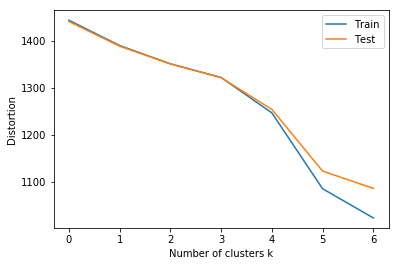

In [13]:
# Plotting the evolution of distortion for train and test set
fig = plt.figure()

##################### TO DO QUESTION 7 ##############################

plt.plot(train_distortions)
plt.plot(test_distortions)
##################### TO DO QUESTION 7 ##############################

plt.xlabel("Number of clusters k")
plt.ylabel("Distortion")
plt.legend(['Train', 'Test'])

<b>Question 8.</b> Compare the results from PCA to the results of K-means on the <b>test set</b> by plotting on the same graph the reconstruction error $E(D)$ for $D3,4,5,10,50,100$ and the distortion cost you just computed (remark that the two measures are simply L$_2$ norms thus the comparison is valid). To be clear, the first one measure the error in the reconstructed image from the projection on the components of PCA, the second measure the error between each image and the centroid of the cluster it is assigned to. Both correpond to the error made when approximating the original image to either its projection or its cluster's centroid.

In [14]:
# No need to recompute kmeans here, just compute PCA for the corresponding values of k (similar to question 2/3)

n_components = [2,3,4,5,10,50,100] # Max number of components to keep

error = []

##################### TO DO QUESTION 8 ##############################
for pca_components in n_components:
    X_mean, components = pca(X, n_components = pca_components)
    Y_projection = pca_project(Y, X_mean, components)
    errors = np.mean(np.linalg.norm(Y - Y_projection, axis = 1))
    error.append(errors)


##################### TO DO QUESTION 8 ##############################

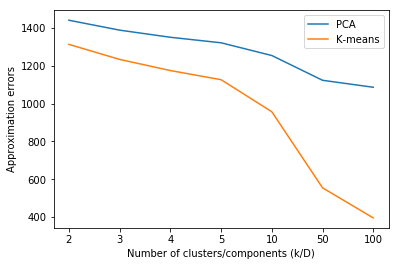

In [15]:
# Plotting the comparison

fig = plt.figure()

##################### TO DO QUESTION 8 ##############################
plt.plot(test_distortions)
plt.plot(error)
##################### TO DO QUESTION 8 ##############################

plt.xlabel("Number of clusters/components (k/D)")
plt.ylabel("Approximation errors")
plt.gca().set_xticklabels([0,2,3,4,5,10,50,100])
plt.legend(['PCA', 'K-means'])

## Remark

The main basis of PCA based dimension reduction is that PCA picks up dimensions with largest variances. Mathematically, this is equivalent to finding the best low rank approximation in L2 norm of the data via singular value decomposition. This is done to minimize mean squared reconstruction error. Similarly, K-means uses square of L2 norm to minimize mean squared reconstruction error. Hence, in both cases we are comparing L2 norms and the comparison is valid.